In [1]:
import pandas as pd
import numpy as np

# Unnecessary index column when writing file

wrong way of saving

In [2]:
df = pd.read_csv('dummie1.csv')
df.to_csv('dummie1_1.csv')
df.head()

,age,length,sleeping_hours,name,date
0,15,1.70,10,hank,1-2-2020
1,16,1.71,10,hank,1-2-2021
2,17,1.72,10,hank,1-2-2022
3,18,1.73,10,hank,1-2-2023
4,20,1.80,6,george,1-2-2020


In [3]:
df = pd.read_csv('dummie1_1.csv')
df.head()

,Unnamed: 0,age,length,sleeping_hours,name,date
0,0,15,1.70,10,hank,1-2-2020
1,1,16,1.71,10,hank,1-2-2021
2,2,17,1.72,10,hank,1-2-2022
3,3,18,1.73,10,hank,1-2-2023
4,4,20,1.80,6,george,1-2-2020


good way of saving

In [4]:
df = pd.read_csv('dummie1.csv')
df.to_csv('dummie1_2.csv', index=False)
df = pd.read_csv('dummie1_2.csv')
df.head()

,age,length,sleeping_hours,name,date
0,15,1.70,10,hank,1-2-2020
1,16,1.71,10,hank,1-2-2021
2,17,1.72,10,hank,1-2-2022
3,18,1.73,10,hank,1-2-2023
4,20,1.80,6,george,1-2-2020


alternative

In [5]:
df = pd.read_csv('dummie1_1.csv', index_col=[0])
df.head()

,age,length,sleeping_hours,name,date
0,15,1.70,10,hank,1-2-2020
1,16,1.71,10,hank,1-2-2021
2,17,1.72,10,hank,1-2-2022
3,18,1.73,10,hank,1-2-2023
4,20,1.80,6,george,1-2-2020


# Query method

In [6]:
df.query('length > 1.70 and age < 30')

,age,length,sleeping_hours,name,date
1,16,1.71,10,hank,1-2-2021
2,17,1.72,10,hank,1-2-2022
3,18,1.73,10,hank,1-2-2023
4,20,1.80,6,george,1-2-2020
5,25,1.81,6,will,1-2-2020
6,25,1.81,7,tim,1-2-2020
7,26,1.81,8,suzane,1-2-2020
8,26,1.81,6,liza,1-2-2020
9,27,1.81,6,betty,1-2-2020


# query strings with @ to easily reach variables

wrong way

In [7]:
min_len = 1.70
max_age = 30

df.query("length > " + str(min_len) + " and age < " + str(max_age))

,age,length,sleeping_hours,name,date
1,16,1.71,10,hank,1-2-2021
2,17,1.72,10,hank,1-2-2022
3,18,1.73,10,hank,1-2-2023
4,20,1.80,6,george,1-2-2020
5,25,1.81,6,will,1-2-2020
6,25,1.81,7,tim,1-2-2020
7,26,1.81,8,suzane,1-2-2020
8,26,1.81,6,liza,1-2-2020
9,27,1.81,6,betty,1-2-2020


good way

In [8]:
df.query("length > @min_len and age < @max_age")

,age,length,sleeping_hours,name,date
1,16,1.71,10,hank,1-2-2021
2,17,1.72,10,hank,1-2-2022
3,18,1.73,10,hank,1-2-2023
4,20,1.80,6,george,1-2-2020
5,25,1.81,6,will,1-2-2020
6,25,1.81,7,tim,1-2-2020
7,26,1.81,8,suzane,1-2-2020
8,26,1.81,6,liza,1-2-2020
9,27,1.81,6,betty,1-2-2020


# Don't use inplace = True

# Treating a slice of a DataFrame as if it is a new DataFrame

it's not.

In [9]:
df_slice = df.query("length > @min_len and age < @max_age")
df_slice['length'] += 1

/tmp/ipykernel_18964/3421777998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slice['length'] += 1


df_slice is basically a pointer to df that just selects a piece of the df. You must ame a copy if you want a separate df.

In [10]:
df_slice = df.query("length > @min_len and age < @max_age").copy()
df_slice['length'] += 1

# organizing chained modifications

wrong way

In [11]:
df = pd.read_csv('dummie1.csv')
df1 = df.query("length > @min_len and age < @max_age")
df2 = df1.groupby('sleeping_hours')[['age']].max()
df3 = df2.sort_values('age')
df3

,age
sleeping_hours,
10,18
7,25
8,26
6,27


good way

In [12]:
df_out = (df.query("length > @min_len and age < @max_age")
          .groupby('sleeping_hours')[['age']].max()
          .sort_values('age'))
df_out

,age
sleeping_hours,
10,18
7,25
8,26
6,27


# Setting column dtypes

In [13]:
df

,age,length,sleeping_hours,name,date
0,15,1.70,10,hank,1-2-2020
1,16,1.71,10,hank,1-2-2021
2,17,1.72,10,hank,1-2-2022
3,18,1.73,10,hank,1-2-2023
4,20,1.80,6,george,1-2-2020
5,25,1.81,6,will,1-2-2020
6,25,1.81,7,tim,1-2-2020
7,26,1.81,8,suzane,1-2-2020
8,26,1.81,6,liza,1-2-2020
9,27,1.81,6,betty,1-2-2020


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             11 non-null     int64  
 1   length          11 non-null     float64
 2   sleeping_hours  11 non-null     int64  
 3   name            11 non-null     object 
 4   date            11 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 568.0+ bytes


In [15]:
df = pd.read_csv('dummie1.csv', parse_dates=['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   age             11 non-null     int64         
 1   length          11 non-null     float64       
 2   sleeping_hours  11 non-null     int64         
 3   name            11 non-null     object        
 4   date            11 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 568.0+ bytes


# When doing the same thing to different df's: Use functions!

wrong (i do this a lot)

In [16]:
df1 = pd.read_csv('dummie1.csv', parse_dates=['date'])
df2 = pd.read_csv('dummie1.csv', parse_dates=['date'])

df1.loc[:,'sleeping_hours'] += 1
df2.loc[:,'sleeping_hours'] += 1
df1.loc[:,'length'] += 0.2
df2.loc[:,'length'] += 0.2
df1.loc[:,'age'] += 4
df2.loc[:,'age'] += 4
df1


,age,length,sleeping_hours,name,date
0,19,1.90,11,hank,2020-01-02
1,20,1.91,11,hank,2021-01-02
2,21,1.92,11,hank,2022-01-02
3,22,1.93,11,hank,2023-01-02
4,24,2.00,7,george,2020-01-02
5,29,2.01,7,will,2020-01-02
6,29,2.01,8,tim,2020-01-02
7,30,2.01,9,suzane,2020-01-02
8,30,2.01,7,liza,2020-01-02
9,31,2.01,7,betty,2020-01-02


good

In [17]:
df1 = pd.read_csv('dummie1.csv', parse_dates=['date'])
df2 = pd.read_csv('dummie1.csv', parse_dates=['date'])

def process_data(df):
    df.loc[:,'sleeping_hours'] += 1
    df.loc[:,'length'] += 0.2
    df.loc[:,'age'] += 4
    return df

df1 = process_data(df1)
df2 = process_data(df2)

# using loop to calculate how a value changes

wrong

In [18]:
hank = df.query('name == "hank"').copy()
for i in range(1,len(hank)):
    hank.loc[i, 'perc_change'] = \
        (hank.loc[i].length - hank.loc[i - 1].length) / (hank.loc[i - 1].length)
    hank.loc[i, 'diff'] = hank.loc[i].length - hank.loc[i - 1].length

hank

,age,length,sleeping_hours,name,date,perc_change,diff
0,15,1.70,10,hank,2020-01-02,NaN,NaN
1,16,1.71,10,hank,2021-01-02,0.005882,0.01
2,17,1.72,10,hank,2022-01-02,0.005848,0.01
3,18,1.73,10,hank,2023-01-02,0.005814,0.01


good

In [19]:
hank = df.query('name == "hank"').copy()
hank['perc_change'] = hank['length'].pct_change()
hank['change'] = hank['length'].diff()
hank

,age,length,sleeping_hours,name,date,perc_change,change
0,15,1.70,10,hank,2020-01-02,NaN,NaN
1,16,1.71,10,hank,2021-01-02,0.005882,0.01
2,17,1.72,10,hank,2022-01-02,0.005848,0.01
3,18,1.73,10,hank,2023-01-02,0.005814,0.01


# Don't save dataset as csv, there are more efficient ways

# You can format like in excell!!!!

In [20]:
df.style.background_gradient(cmap='Reds')

,age,length,sleeping_hours,name,date
0,15,1.700000,10,hank,2020-01-02 00:00:00
1,16,1.710000,10,hank,2021-01-02 00:00:00
2,17,1.720000,10,hank,2022-01-02 00:00:00
3,18,1.730000,10,hank,2023-01-02 00:00:00
4,20,1.800000,6,george,2020-01-02 00:00:00
5,25,1.810000,6,will,2020-01-02 00:00:00
6,25,1.810000,7,tim,2020-01-02 00:00:00
7,26,1.810000,8,suzane,2020-01-02 00:00:00
8,26,1.810000,6,liza,2020-01-02 00:00:00
9,27,1.810000,6,betty,2020-01-02 00:00:00


In [21]:
df2 = pd.DataFrame(np.random.randn(10,4), columns=list('ABCD'))
(df2.style.format('{:.3f}', na_rep="")
 .bar(align=0, vmin=-2.5, vmax=2.5, cmap='bwr', height=50, width=60,
      props='width: 120px; border-right: 1px solid black;')
      .text_gradient(cmap='bwr', vmin=-2.5, vmax=2.5))

,A,B,C,D
0,0.061,0.078,-1.621,0.275
1,-0.957,-0.479,-0.203,-0.589
2,-1.664,1.608,-1.083,-0.940
3,0.901,0.381,0.270,2.502
4,-0.487,-1.275,-0.596,1.573
5,1.377,0.564,-0.472,1.183
6,-0.610,1.154,0.699,0.175
7,-1.238,0.859,-0.601,1.167
8,0.913,-1.012,0.449,-0.399
9,1.272,0.696,-0.959,-0.021


# Put suffixes when doing a merge

wrong

In [22]:
df2 = pd.DataFrame(np.random.randn(3,2), columns=list('AB'))
df2["owner"] = ["tom",'jerry','elenor']
df3 = pd.DataFrame(np.random.randn(3,2), columns=list('AB'))
df3["owner"] = ["tom",'jerry','elenor']

df_merged = df2.merge(df3, on=['owner'])
df_merged

,A_x,B_x,owner,A_y,B_y
0,-0.291258,-1.432996,tom,-0.189116,-1.227378
1,-1.925195,0.138677,jerry,-1.185295,-1.451881
2,-0.438172,1.787292,elenor,0.775227,0.484732


good

In [23]:
df_merged = df2.merge(df3, on=['owner'], suffixes=('_df2','_df3'))
df_merged

,A_df2,B_df2,owner,A_df3,B_df3
0,-0.291258,-1.432996,tom,-0.189116,-1.227378
1,-1.925195,0.138677,jerry,-1.185295,-1.451881
2,-0.438172,1.787292,elenor,0.775227,0.484732


# manualy check if merge went as expected

we don't want multiple 'primary keys' to excist in the dataframes when it's being merged.

wrong way of checking this

In [24]:
df2 = pd.DataFrame(np.random.randn(4,2), columns=list('AB'))
df2["owner"] = ["tom",'jerry','elenor', 'tom']
df3 = pd.DataFrame(np.random.randn(4,2), columns=list('AB'))
df3["owner"] = ["tom",'jerry','elenor', 'jerry']

df_merged = df2.merge(df3, on=['owner'], suffixes=('_df2','_df3'))

len(df_merged) == len(df3)

False

good way of checking

In [25]:
# df_merged = df2.merge(df3, on=['owner'], suffixes=('_df2','_df3'), validate='1:1')

# Use categorical datatypes!!!

We're going to make the names a category!

In [26]:
df = pd.read_csv('dummie1.csv')
df

,age,length,sleeping_hours,name,date
0,15,1.70,10,hank,1-2-2020
1,16,1.71,10,hank,1-2-2021
2,17,1.72,10,hank,1-2-2022
3,18,1.73,10,hank,1-2-2023
4,20,1.80,6,george,1-2-2020
5,25,1.81,6,will,1-2-2020
6,25,1.81,7,tim,1-2-2020
7,26,1.81,8,suzane,1-2-2020
8,26,1.81,6,liza,1-2-2020
9,27,1.81,6,betty,1-2-2020


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             11 non-null     int64  
 1   length          11 non-null     float64
 2   sleeping_hours  11 non-null     int64  
 3   name            11 non-null     object 
 4   date            11 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 568.0+ bytes


In [28]:
df.name = df.name.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             11 non-null     int64   
 1   length          11 non-null     float64 
 2   sleeping_hours  11 non-null     int64   
 3   name            11 non-null     category
 4   date            11 non-null     object  
dtypes: category(1), float64(1), int64(2), object(1)
memory usage: 855.0+ bytes


# check for duplicate columns

now you get a lot of duplicated columns

In [29]:
df_double = pd.concat([df,df],axis=1)
df_double

,age,length,sleeping_hours,name,date,age,length,sleeping_hours,name,date
0,15,1.70,10,hank,1-2-2020,15,1.70,10,hank,1-2-2020
1,16,1.71,10,hank,1-2-2021,16,1.71,10,hank,1-2-2021
2,17,1.72,10,hank,1-2-2022,17,1.72,10,hank,1-2-2022
3,18,1.73,10,hank,1-2-2023,18,1.73,10,hank,1-2-2023
4,20,1.80,6,george,1-2-2020,20,1.80,6,george,1-2-2020
5,25,1.81,6,will,1-2-2020,25,1.81,6,will,1-2-2020
6,25,1.81,7,tim,1-2-2020,25,1.81,7,tim,1-2-2020
7,26,1.81,8,suzane,1-2-2020,26,1.81,8,suzane,1-2-2020
8,26,1.81,6,liza,1-2-2020,26,1.81,6,liza,1-2-2020
9,27,1.81,6,betty,1-2-2020,27,1.81,6,betty,1-2-2020


You can set a flag to give you a warning when this happens.

In [30]:
# df_double = pd.concat([df,df],axis=1).set_flags(allows_duplicate_labels=False)

check for duplicated columns and remove them

In [31]:
df_double = pd.concat([df,df],axis=1)
df_double = df_double.loc[:,~df_double.columns.duplicated()].copy()
df_double

,age,length,sleeping_hours,name,date
0,15,1.70,10,hank,1-2-2020
1,16,1.71,10,hank,1-2-2021
2,17,1.72,10,hank,1-2-2022
3,18,1.73,10,hank,1-2-2023
4,20,1.80,6,george,1-2-2020
5,25,1.81,6,will,1-2-2020
6,25,1.81,7,tim,1-2-2020
7,26,1.81,8,suzane,1-2-2020
8,26,1.81,6,liza,1-2-2020
9,27,1.81,6,betty,1-2-2020


# best ways to save DataFrames to disk
## create dataset

In [3]:
def get_dataset(size):
    df = pd.DataFrame()
    df['size'] = np.random.choice(['big','medium','small'], size)
    df['age'] = np.random.randint(1, 50, size)
    df['team'] = np.random.choice(['red','blue','yellow'], size)
    df['win'] = np.random.choice(['yes','no'], size)
    dates = pd.date_range('2020-01-01', '2022-12-31')
    df['date'] = np.random.choice(dates, size)
    df['prob'] = np.random.uniform(0,1,size)
    return df


def set_dtypes(df):
    df['size'] = df['size'].astype('category')
    df['age'] = df['age'].astype('int')
    df['team'] = df['team'].astype('category')
    df['win'] = df['win'].map({'yes': True, 'no': False})
    df['prob'] = df['prob'].astype('float')
    return df

In [33]:
df_raw = get_dataset(1_000_000)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   size    1000000 non-null  object        
 1   age     1000000 non-null  int64         
 2   team    1000000 non-null  object        
 3   win     1000000 non-null  object        
 4   date    1000000 non-null  datetime64[ns]
 5   prob    1000000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 45.8+ MB


In [34]:
df_raw.head()

,size,age,team,win,date,prob
0,medium,22,red,yes,2022-08-30,0.207074
1,big,2,yellow,yes,2022-09-06,0.406475
2,big,21,red,yes,2022-04-14,0.797266
3,medium,21,yellow,yes,2022-08-11,0.797641
4,medium,37,blue,no,2020-05-23,0.920938


## write to csv

### no change

In [35]:
# %%timeit
df_raw.to_csv('test_csv_raw.csv')

In [36]:
!ls -GFlash test_csv_raw.csv

52M -rwxrwxrwx 1 user 52M mrt  2 14:53 test_csv_raw.csv*


In [37]:
# %%timeit
df_raw2 = pd.read_csv('test_csv_raw.csv')

In [38]:
df_raw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1000000 non-null  int64  
 1   size        1000000 non-null  object 
 2   age         1000000 non-null  int64  
 3   team        1000000 non-null  object 
 4   win         1000000 non-null  object 
 5   date        1000000 non-null  object 
 6   prob        1000000 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 53.4+ MB


In [39]:
df_raw2.head()

,Unnamed: 0,size,age,team,win,date,prob
0,0,medium,22,red,yes,2022-08-30,0.207074
1,1,big,2,yellow,yes,2022-09-06,0.406475
2,2,big,21,red,yes,2022-04-14,0.797266
3,3,medium,21,yellow,yes,2022-08-11,0.797641
4,4,medium,37,blue,no,2020-05-23,0.920938


### index = True

let's see what happens to the size if we don't put an index in it

In [40]:
# %%timeit
df_raw.to_csv('test_csv_raw.csv', index=True)

In [41]:
!ls -GFlash test_csv.csv

46M -rwxrwxrwx 1 user 46M mrt  2 13:32 test_csv.csv*


In [42]:
# %%timeit
df_raw2 = pd.read_csv('test_csv_raw.csv')

In [43]:
df_raw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1000000 non-null  int64  
 1   size        1000000 non-null  object 
 2   age         1000000 non-null  int64  
 3   team        1000000 non-null  object 
 4   win         1000000 non-null  object 
 5   date        1000000 non-null  object 
 6   prob        1000000 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 53.4+ MB


In [44]:
df_raw2.head()

,Unnamed: 0,size,age,team,win,date,prob
0,0,medium,22,red,yes,2022-08-30,0.207074
1,1,big,2,yellow,yes,2022-09-06,0.406475
2,2,big,21,red,yes,2022-04-14,0.797266
3,3,medium,21,yellow,yes,2022-08-11,0.797641
4,4,medium,37,blue,no,2020-05-23,0.920938


### index = false

You get a smaller file, that gives no index problems, and is a little bit faster in reading and writing

In [45]:
# %%timeit
df_raw.to_csv('test_csv_raw.csv', index=False)

In [46]:
!ls -GFlash test_csv_raw.csv

46M -rwxrwxrwx 1 user 46M mrt  2 14:54 test_csv_raw.csv*


In [47]:
# %%timeit
df_raw2 = pd.read_csv('test_csv_raw.csv')

In [48]:
df_raw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   size    1000000 non-null  object 
 1   age     1000000 non-null  int64  
 2   team    1000000 non-null  object 
 3   win     1000000 non-null  object 
 4   date    1000000 non-null  object 
 5   prob    1000000 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 45.8+ MB


In [49]:
df_raw2.head()

,size,age,team,win,date,prob
0,medium,22,red,yes,2022-08-30,0.207074
1,big,2,yellow,yes,2022-09-06,0.406475
2,big,21,red,yes,2022-04-14,0.797266
3,medium,21,yellow,yes,2022-08-11,0.797641
4,medium,37,blue,no,2020-05-23,0.920938


## look at the dtypes

In [50]:
# %%timeit
df_dtypes = get_dataset(1_000_000)

In [51]:
df_dtypes = set_dtypes(df_dtypes)
df_dtypes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   size    1000000 non-null  category      
 1   age     1000000 non-null  int64         
 2   team    1000000 non-null  category      
 3   win     1000000 non-null  bool          
 4   date    1000000 non-null  datetime64[ns]
 5   prob    1000000 non-null  float64       
dtypes: bool(1), category(2), datetime64[ns](1), float64(1), int64(1)
memory usage: 25.7 MB


That's a shrinkage from ... to ...

writing to csv destroys the dtype metadata...

## Pickle

### without dtypes

In [52]:
# df = get_dataset(1_000_000)
# %%timeit df.to_pickle('test.pickle')
# %%timeit df_pickle = pd.read_pickle('test.pickle')
df_raw.to_pickle('test_raw.pickle')
df_pickle_raw = pd.read_pickle('test_raw.pickle')

In [53]:
!ls -GFlash test_raw.pickle

43M -rwxrwxrwx 1 user 43M mrt  2 14:54 test_raw.pickle*


In [54]:
df_pickle_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   size    1000000 non-null  object        
 1   age     1000000 non-null  int64         
 2   team    1000000 non-null  object        
 3   win     1000000 non-null  object        
 4   date    1000000 non-null  datetime64[ns]
 5   prob    1000000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 45.8+ MB


### with dtypes

In [55]:
# %%timeit df.to_pickle('test.pickle')
# %%timeit df_pickle = pd.read_pickle('test.pickle')
# %%timeit df_dtypes.to_pickle('test_dtype.pickle')
# %%timeit df_pickle = pd.read_pickle('test_dtype.pickle')
df_dtypes.to_pickle('test_dtype.pickle')
df_pickle_dtypes = pd.read_pickle('test_dtype.pickle')

In [56]:
!ls -GFlash test_dtype.pickle

26M -rwxrwxrwx 1 user 26M mrt  2 14:54 test_dtype.pickle*


In [57]:
df_pickle_dtypes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   size    1000000 non-null  category      
 1   age     1000000 non-null  int64         
 2   team    1000000 non-null  category      
 3   win     1000000 non-null  bool          
 4   date    1000000 non-null  datetime64[ns]
 5   prob    1000000 non-null  float64       
dtypes: bool(1), category(2), datetime64[ns](1), float64(1), int64(1)
memory usage: 25.7 MB


## Parquet

### raw

In [58]:
# %%timeit df_raw.to_parquet('test_raw.parquet')
# %%timeit df_parque_raw = pd.read_parquet('test_raw.parquet')
df_raw.to_parquet('test_raw.parquet')
df_parque_raw = pd.read_parquet('test_raw.parquet')

In [59]:
!ls -GFlash test_raw.parquet

11M -rwxrwxrwx 1 user 11M mrt  2 14:54 test_raw.parquet*


In [60]:
df_parque_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   size    1000000 non-null  object        
 1   age     1000000 non-null  int64         
 2   team    1000000 non-null  object        
 3   win     1000000 non-null  object        
 4   date    1000000 non-null  datetime64[ns]
 5   prob    1000000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 45.8+ MB


### dtypes

In [61]:
# %%timeit df_raw.to_parquet('test_raw.parquet')
# %%timeit df_parque_raw = pd.read_parquet('test_raw.parquet')
df_dtypes.to_parquet('test_dtypes.parquet')
df_parque_dtypes = pd.read_parquet('test_dtypes.parquet')

In [62]:
!ls -GFlash test_dtypes.parquet

11M -rwxrwxrwx 1 user 11M mrt  2 14:54 test_dtypes.parquet*


In [63]:
df_parque_dtypes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   size    1000000 non-null  category      
 1   age     1000000 non-null  int64         
 2   team    1000000 non-null  category      
 3   win     1000000 non-null  bool          
 4   date    1000000 non-null  datetime64[ns]
 5   prob    1000000 non-null  float64       
dtypes: bool(1), category(2), datetime64[ns](1), float64(1), int64(1)
memory usage: 25.7 MB


In [64]:
df_parque_dtypes.head()

,size,age,team,win,date,prob
0,small,35,red,False,2020-04-07,0.038584
1,small,24,yellow,False,2022-08-14,0.856441
2,small,29,red,True,2020-11-14,0.357914
3,big,42,red,True,2021-10-03,0.919859
4,medium,42,blue,False,2020-09-15,0.211747


### You can also only read certain columns!!!!

In [65]:
test = pd.read_parquet('test_raw.parquet', columns=['date','win'])
test

,date,win
0,2022-08-30,yes
1,2022-09-06,yes
2,2022-04-14,yes
3,2022-08-11,yes
4,2020-05-23,no
...,...,...
999995,2021-09-11,no
999996,2020-11-30,no
999997,2020-03-12,yes
999998,2021-10-22,yes


## feather

### raw

In [66]:
# %%timeit df_raw.to_parquet('test_raw.parquet')
# %%timeit df_parque_raw = pd.read_parquet('test_raw.parquet')
df_raw.to_feather('test_raw.feather')
df_feather_raw = pd.read_feather('test_raw.feather')

In [67]:
!ls -GFlash test_raw.feather

29M -rwxrwxrwx 1 user 29M mrt  2 14:54 test_raw.feather*


In [68]:
df_feather_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   size    1000000 non-null  object        
 1   age     1000000 non-null  int64         
 2   team    1000000 non-null  object        
 3   win     1000000 non-null  object        
 4   date    1000000 non-null  datetime64[ns]
 5   prob    1000000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 45.8+ MB


In [69]:
df_feather_raw.head()

,size,age,team,win,date,prob
0,medium,22,red,yes,2022-08-30,0.207074
1,big,2,yellow,yes,2022-09-06,0.406475
2,big,21,red,yes,2022-04-14,0.797266
3,medium,21,yellow,yes,2022-08-11,0.797641
4,medium,37,blue,no,2020-05-23,0.920938


### dtypes

In [70]:
# %%timeit df_raw.to_parquet('test_raw.parquet')
# %%timeit df_parque_raw = pd.read_parquet('test_raw.parquet')
df_dtypes.to_feather('test_dtypes.feather')
df_feather_dtypes = pd.read_feather('test_dtypes.feather')

In [71]:
!ls -GFlash test_dtypes.feather

15M -rwxrwxrwx 1 user 15M mrt  2 14:54 test_dtypes.feather*


In [72]:
df_feather_dtypes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   size    1000000 non-null  category      
 1   age     1000000 non-null  int64         
 2   team    1000000 non-null  category      
 3   win     1000000 non-null  bool          
 4   date    1000000 non-null  datetime64[ns]
 5   prob    1000000 non-null  float64       
dtypes: bool(1), category(2), datetime64[ns](1), float64(1), int64(1)
memory usage: 25.7 MB


In [73]:
df_feather_dtypes.head()

,size,age,team,win,date,prob
0,small,35,red,False,2020-04-07,0.038584
1,small,24,yellow,False,2022-08-14,0.856441
2,small,29,red,True,2020-11-14,0.357914
3,big,42,red,True,2021-10-03,0.919859
4,medium,42,blue,False,2020-09-15,0.211747


## Benchmarking

Parquet is the way to go!

In [18]:
df = get_dataset(3_000_000)
# df = get_dataset(100_000)
df_dtypes = set_dtypes(df)

In [29]:
benchmarks = pd.DataFrame({'filetype': ['csv','csv','pickle','pickle','parquet','parquet','feather','feather','csv','csv','pickle','pickle','parquet','parquet','feather','feather', 'pickle gz l1', 'pickle gz l1', 'pickle gz l1', 'pickle gz l1'],
              'dtype_set': [False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True, False, True, False, True],
              'r_w': ['w','r','w','r','w','r','w','r','w','r','w','r','w','r','w','r','w','w','r','r'],
              'time': [26.8,2.06,0.610,0.0205,0.618,0.106,0.499,0.064,29.3,2.12,0.560,0.0206,0.597,0.102,0.475,0.0662,1.93,1.91,0.383,0.374],
              "size": [164,140,78,77.2,32,77.2,45,77.2,164,140.2,78,77.2,32,77.2,45,77.2,34,34,77.2,77.2]
              })

<AxesSubplot:title={'center':'processing time in seconds'}, xlabel='filetype,dtype_set,r_w'>

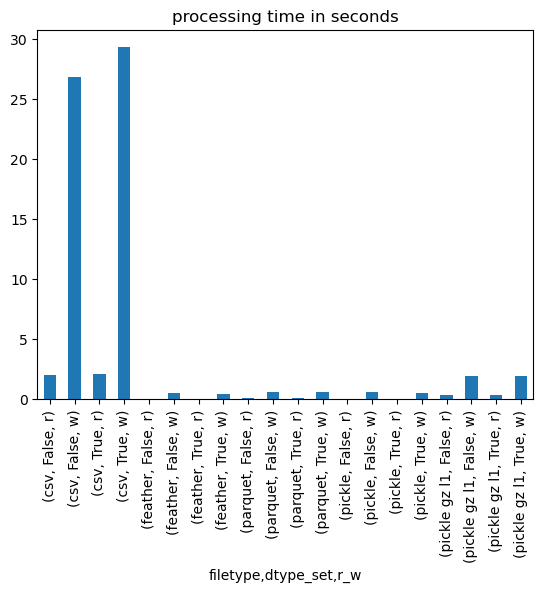

In [30]:
benchmarks.groupby(['filetype','dtype_set','r_w']).time.sum().plot.bar(title='processing time in seconds')

<AxesSubplot:title={'center':'processing time in seconds'}, xlabel='filetype,dtype_set,r_w'>

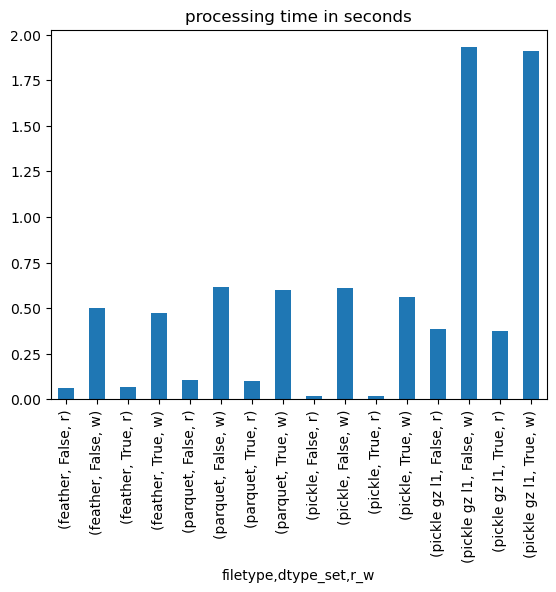

In [33]:
# benchmarks.groupby(['filetype','dtype_set','r_w']).time.sum().plot.bar()
benchmarks.query('filetype != "csv"').groupby(['filetype','dtype_set','r_w']).time.sum().plot.bar(title='processing time in seconds')

<AxesSubplot:title={'center':'file size in MB'}, xlabel='filetype,dtype_set,r_w'>

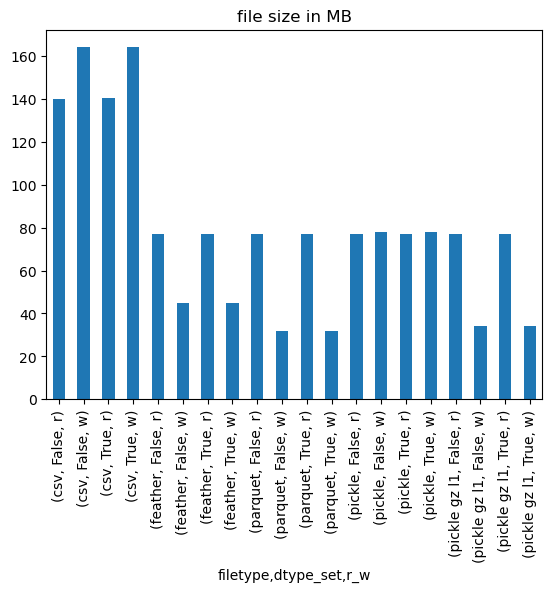

In [32]:
benchmarks.groupby(['filetype','dtype_set','r_w'])["size"].sum().plot.bar(title='file size in MB')

Parquet has the smalles file size. But pickle has the fastest loading time. Plus parquet can load individual columns. parquet sound like the way to go.

### reading and writing

#### no dtypes

In [218]:
%timeit df.to_csv("test.csv")
%timeit df2 = pd.read_csv("test.csv")
df.to_csv("test.csv")
df2 = pd.read_csv("test.csv")

26.8 s ± 1.36 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.06 s ± 55.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [219]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   size        object 
 2   age         int64  
 3   team        object 
 4   win         bool   
 5   date        object 
 6   prob        float64
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 140.2+ MB


In [220]:
%timeit df.to_pickle("test.pickle")
%timeit df2 = pd.read_pickle("test.pickle")
df.to_pickle("test.pickle")
df2 = pd.read_pickle("test.pickle")

610 ms ± 48.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
20.5 ms ± 1.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [221]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   size    category      
 1   age     int64         
 2   team    category      
 3   win     bool          
 4   date    datetime64[ns]
 5   prob    float64       
dtypes: bool(1), category(2), datetime64[ns](1), float64(1), int64(1)
memory usage: 77.2 MB


In [19]:
%timeit df.to_pickle("test.pickle.gz", compression={'method': 'gzip', 'compresslevel': 1, 'mtime': 1})
%timeit df2 = pd.read_pickle("test.pickle.gz")
df.to_pickle("test.pickle.gz", compression={'method': 'gzip', 'compresslevel': 1, 'mtime': 1})
df2 = pd.read_pickle("test.pickle.gz")

1.93 s ± 33.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
383 ms ± 14.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   size    category      
 1   age     int64         
 2   team    category      
 3   win     bool          
 4   date    datetime64[ns]
 5   prob    float64       
dtypes: bool(1), category(2), datetime64[ns](1), float64(1), int64(1)
memory usage: 77.2 MB


In [236]:
%timeit df.to_parquet("test.parquet")
%timeit df2 = pd.read_parquet("test.parquet")
df.to_parquet("test.parquet")
df2 = pd.read_parquet("test.parquet")

618 ms ± 14.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
106 ms ± 4.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [223]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   size    category      
 1   age     int64         
 2   team    category      
 3   win     bool          
 4   date    datetime64[ns]
 5   prob    float64       
dtypes: bool(1), category(2), datetime64[ns](1), float64(1), int64(1)
memory usage: 77.2 MB


In [224]:
%timeit df.to_feather("test.feather")
%timeit df2 = pd.read_feather("test.feather")
df.to_feather("test.feather")
df2 = pd.read_feather("test.feather")

499 ms ± 58.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
64.3 ms ± 1.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [225]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   size    category      
 1   age     int64         
 2   team    category      
 3   win     bool          
 4   date    datetime64[ns]
 5   prob    float64       
dtypes: bool(1), category(2), datetime64[ns](1), float64(1), int64(1)
memory usage: 77.2 MB


#### dtypes

In [226]:
%timeit df_dtypes.to_csv("test_dt.csv")
%timeit df_dtypes2 = pd.read_csv("test_dt.csv")
df_dtypes.to_csv("test_dt.csv")
df_dtypes2 = pd.read_csv("test_dt.csv")

29.3 s ± 2.39 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.13 s ± 50 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [227]:
df_dtypes2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   size        object 
 2   age         int64  
 3   team        object 
 4   win         bool   
 5   date        object 
 6   prob        float64
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 140.2+ MB


In [228]:
%timeit df_dtypes.to_pickle("test_dt.pickle")
%timeit df_dtypes2 = pd.read_pickle("test_dt.pickle")
df_dtypes.to_pickle("test_dt.pickle")
df_dtypes2 = pd.read_pickle("test_dt.pickle")

560 ms ± 14.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
20.6 ms ± 232 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [229]:
df_dtypes2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   size    category      
 1   age     int64         
 2   team    category      
 3   win     bool          
 4   date    datetime64[ns]
 5   prob    float64       
dtypes: bool(1), category(2), datetime64[ns](1), float64(1), int64(1)
memory usage: 77.2 MB


In [27]:
%timeit df_dtypes.to_pickle("test_dt.pickle.gz", compression={'method': 'gzip', 'compresslevel': 1, 'mtime': 1})
%timeit df_dtypes2 = pd.read_pickle("test_dt.pickle.gz")
df_dtypes.to_pickle("test_dt.pickle.gz", compression={'method': 'gzip', 'compresslevel': 1, 'mtime': 1})
df_dtypes2 = pd.read_pickle("test_dt.pickle.gz")

1.98 s ± 44.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
390 ms ± 17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
df_dtypes2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   size    category      
 1   age     int64         
 2   team    category      
 3   win     bool          
 4   date    datetime64[ns]
 5   prob    float64       
dtypes: bool(1), category(2), datetime64[ns](1), float64(1), int64(1)
memory usage: 77.2 MB


In [230]:
%timeit df_dtypes.to_parquet("test_dt.parquet")
%timeit df_dtypes2 = pd.read_parquet("test_dt.parquet")
df_dtypes.to_parquet("test_dt.parquet")
df_dtypes2 = pd.read_parquet("test_dt.parquet")

597 ms ± 17.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
102 ms ± 3.75 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [231]:
df_dtypes2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   size    category      
 1   age     int64         
 2   team    category      
 3   win     bool          
 4   date    datetime64[ns]
 5   prob    float64       
dtypes: bool(1), category(2), datetime64[ns](1), float64(1), int64(1)
memory usage: 77.2 MB


In [232]:
%timeit df_dtypes.to_feather("test_dt.feather")
%timeit df_dtypes2 = pd.read_feather("test_dt.feather")
df_dtypes.to_feather("test_dt.feather")
df_dtypes2 = pd.read_feather("test_dt.feather")

475 ms ± 6.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
66.2 ms ± 5.67 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [233]:
df_dtypes2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   size    category      
 1   age     int64         
 2   team    category      
 3   win     bool          
 4   date    datetime64[ns]
 5   prob    float64       
dtypes: bool(1), category(2), datetime64[ns](1), float64(1), int64(1)
memory usage: 77.2 MB


### memory sizes

In [21]:
!ls -GFlash test.csv test.pickle test.pickle.gz test.parquet test.feather

164M -rwxrwxrwx 1 user 164M mrt  2 15:48 test.csv*
 45M -rwxrwxrwx 1 user  45M mrt  2 15:49 test.feather*
 32M -rwxrwxrwx 1 user  32M mrt  2 16:09 test.parquet*
 78M -rwxrwxrwx 1 user  78M mrt  2 15:48 test.pickle*
 34M -rwxrwxrwx 1 user  34M mrt  3 12:44 test.pickle.gz*


In [22]:
!ls -GFlash test_dt.csv test_dt.pickle test_dt.pickle.gz test_dt.parquet test_dt.feather

164M -rwxrwxrwx 1 user 164M mrt  2 15:53 test_dt.csv*
 45M -rwxrwxrwx 1 user  45M mrt  2 15:54 test_dt.feather*
 32M -rwxrwxrwx 1 user  32M mrt  2 15:54 test_dt.parquet*
 78M -rwxrwxrwx 1 user  78M mrt  2 15:53 test_dt.pickle*
 34M -rwxrwxrwx 1 user  34M mrt  3 12:47 test_dt.pickle.gz*
